In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
import numpy as np

In [3]:
path = '/Users/gwynethvolkmann/Downloads'
os.chdir(path)

In [8]:
df = pd.read_csv("Shiftsmart Data.csv")
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15,18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,worker,project,status,title,start,end,duration,rate,created_at,...,checkin_at,On time,checkout_at,On time.1,performance_rating,payment_status,approval_status,payment_due,hours_worked,bonus
0,58890,6c2978aa,Product Tester,Completed,Product Tester (Dallas),3/25/21 20:00,3/25/21 21:30,1.5,20,3/19/21 22:51,...,3/25/21 20:13,NaN,3/25/21 22:17,NaN,1.0,paid,approved,41.40,2.06,100.0
1,8769,016c3ad6,Local Courier,Completed,Local Courier (Dallas),3/26/21 14:25,3/26/21 17:00,2.5,12,3/26/21 14:19,...,3/26/21 16:37,NaN,3/26/21 18:30,NaN,1.0,paid,approved,30.00,1.88,50.0
2,25104,8f06633b,Product Tester,Completed,Product Tester (Dallas),3/24/21 14:00,3/24/21 15:30,1.5,20,3/18/21 15:08,...,3/24/21 13:53,NaN,3/24/21 16:02,NaN,1.0,paid,approved,40.00,2.15,50.0
3,47791,b68f79f8,Local Courier,Completed,Local Courier (Sacremento),3/23/21 22:10,3/24/21 1:10,3.0,17,3/23/21 22:08,...,3/23/21 22:09,NaN,3/24/21 4:14,NaN,1.0,paid,approved,51.00,6.09,50.0
4,32056,ddcb2032,Local Courier,Completed,Local Courier (SF),3/17/21 19:45,3/17/21 22:45,3.0,19,3/17/21 19:50,...,3/17/21 19:00,NaN,3/17/21 23:00,NaN,1.0,paid,approved,65.17,3.99,20.0


In [9]:
df.columns

Index(['id', 'worker', 'project', 'status', 'title', 'start', 'end',
       'duration', 'rate', 'created_at', 'sent_at', 'seen_at', 'assigned_at',
       'canceled_at', 'confirmed_at', 'confirmedby', 'canceled_by',
       'confirmed_by', 'checkin_at', 'On time', 'checkout_at', 'On time.1',
       'performance_rating', 'payment_status', 'approval_status',
       'payment_due', 'hours_worked', 'bonus'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75437 entries, 0 to 75436
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  75437 non-null  int64  
 1   worker              75437 non-null  object 
 2   project             75437 non-null  object 
 3   status              75437 non-null  object 
 4   title               75437 non-null  object 
 5   start               75437 non-null  object 
 6   end                 75437 non-null  object 
 7   duration            75437 non-null  float64
 8   rate                75437 non-null  int64  
 9   created_at          75437 non-null  object 
 10  sent_at             74931 non-null  object 
 11  seen_at             33802 non-null  object 
 12  assigned_at         8323 non-null   object 
 13  canceled_at         5438 non-null   object 
 14  confirmed_at        4547 non-null   object 
 15  confirmedby         1 non-null      object 
 16  canc

In [14]:
df.describe()

,id,duration,rate,On time,On time.1,performance_rating,payment_due,hours_worked,bonus
count,75437.000000,75437.000000,75437.000000,0.0,0.0,5434.000000,75437.000000,5313.000000,25345.000000
mean,37719.000000,2.763110,15.690563,NaN,NaN,50.165808,43.010835,3.226960,56.677096
std,21776.930466,1.308193,3.999575,NaN,NaN,28.924814,23.963840,1.733739,35.140051
min,1.000000,0.000000,10.000000,NaN,NaN,1.000000,0.000000,0.000000,10.000000
25%,18860.000000,1.500000,12.000000,NaN,NaN,25.000000,30.000000,2.080000,20.000000
50%,37719.000000,3.000000,17.000000,NaN,NaN,50.000000,34.000000,3.040000,50.000000
75%,56578.000000,4.000000,20.000000,NaN,NaN,75.000000,54.000000,4.060000,100.000000
max,75437.000000,16.000000,30.000000,NaN,NaN,100.000000,521.550000,24.000000,120.000000


In [11]:
len(df[df['project'] == 'Local Courier'])

36985

In [12]:
len(df[df['project'] == 'Product Tester'])

19504

In [13]:
len(df[df['project'] == 'Customer Service (Remote)'])

18948

In [19]:
product_tester = df.loc[df['project']== 'Product Tester', :]
product_tester.head()

,id,worker,project,status,title,start,end,duration,rate,created_at,...,checkin_at,On time,checkout_at,On time.1,performance_rating,payment_status,approval_status,payment_due,hours_worked,bonus
0,58890,6c2978aa,Product Tester,Completed,Product Tester (Dallas),3/25/21 20:00,3/25/21 21:30,1.5,20,3/19/21 22:51,...,3/25/21 20:13,NaN,3/25/21 22:17,NaN,1.0,paid,approved,41.4,2.06,100.0
2,25104,8f06633b,Product Tester,Completed,Product Tester (Dallas),3/24/21 14:00,3/24/21 15:30,1.5,20,3/18/21 15:08,...,3/24/21 13:53,NaN,3/24/21 16:02,NaN,1.0,paid,approved,40.0,2.15,50.0
29,43733,f1a36c39,Product Tester,Completed,Product Tester (Dallas),3/23/21 20:00,3/23/21 21:30,1.5,20,3/19/21 23:51,...,3/23/21 19:46,NaN,3/23/21 21:22,NaN,1.0,paid,approved,74.6,1.60,NaN
51,8864,2ad050b2,Product Tester,Completed,Product Tester (Dallas),3/26/21 14:00,3/26/21 15:30,1.5,20,3/24/21 20:23,...,3/26/21 13:45,NaN,3/26/21 14:53,NaN,2.0,paid,approved,21.6,1.13,100.0
100,68979,f65a4bbd,Product Tester,Completed,Product Tester (Dallas),3/17/21 15:30,3/17/21 16:30,1.0,20,3/12/21 19:20,...,3/17/21 15:43,NaN,3/17/21 17:16,NaN,2.0,paid,approved,81.0,1.56,NaN


In [20]:
product_tester.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19504 entries, 0 to 75436
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19504 non-null  int64  
 1   worker              19504 non-null  object 
 2   project             19504 non-null  object 
 3   status              19504 non-null  object 
 4   title               19504 non-null  object 
 5   start               19504 non-null  object 
 6   end                 19504 non-null  object 
 7   duration            19504 non-null  float64
 8   rate                19504 non-null  int64  
 9   created_at          19504 non-null  object 
 10  sent_at             19445 non-null  object 
 11  seen_at             8781 non-null   object 
 12  assigned_at         548 non-null    object 
 13  canceled_at         351 non-null    object 
 14  confirmed_at        332 non-null    object 
 15  confirmedby         0 non-null      object 
 16  canc

In [34]:
local_courier = df.loc[df['project']== 'Local Courier', :]
local_courier.head()

,id,worker,project,status,title,start,end,duration,rate,created_at,...,checkin_at,On time,checkout_at,On time.1,performance_rating,payment_status,approval_status,payment_due,hours_worked,bonus
1,8769,016c3ad6,Local Courier,Completed,Local Courier (Dallas),3/26/21 14:25,3/26/21 17:00,2.5,12,3/26/21 14:19,...,3/26/21 16:37,NaN,3/26/21 18:30,NaN,1.0,paid,approved,30.00,1.88,50.0
3,47791,b68f79f8,Local Courier,Completed,Local Courier (Sacremento),3/23/21 22:10,3/24/21 1:10,3.0,17,3/23/21 22:08,...,3/23/21 22:09,NaN,3/24/21 4:14,NaN,1.0,paid,approved,51.00,6.09,50.0
4,32056,ddcb2032,Local Courier,Completed,Local Courier (SF),3/17/21 19:45,3/17/21 22:45,3.0,19,3/17/21 19:50,...,3/17/21 19:00,NaN,3/17/21 23:00,NaN,1.0,paid,approved,65.17,3.99,20.0
6,2591,61c68bee,Local Courier,Completed,Local Courier (SF),3/23/21 21:00,3/24/21 1:00,4.0,19,3/19/21 21:14,...,3/23/21 21:00,NaN,3/24/21 2:07,NaN,1.0,paid,approved,88.54,5.11,NaN
7,6463,aa5605db,Local Courier,Completed,Local Courier (Sacremento),3/8/21 1:00,3/8/21 5:00,4.0,17,3/7/21 23:21,...,3/8/21 0:58,NaN,3/8/21 5:00,NaN,1.0,paid,approved,72.76,4.04,NaN


In [35]:
local_courier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36985 entries, 1 to 74926
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  36985 non-null  int64  
 1   worker              36985 non-null  object 
 2   project             36985 non-null  object 
 3   status              36985 non-null  object 
 4   title               36985 non-null  object 
 5   start               36985 non-null  object 
 6   end                 36985 non-null  object 
 7   duration            36985 non-null  float64
 8   rate                36985 non-null  int64  
 9   created_at          36985 non-null  object 
 10  sent_at             36621 non-null  object 
 11  seen_at             11940 non-null  object 
 12  assigned_at         2985 non-null   object 
 13  canceled_at         3012 non-null   object 
 14  confirmed_at        1875 non-null   object 
 15  confirmedby         0 non-null      object 
 16  canc

In [30]:
customer_service = df.loc[df['project']== 'Customer Service (Remote)', :]
customer_service.head()

,id,worker,project,status,title,start,end,duration,rate,created_at,...,checkin_at,On time,checkout_at,On time.1,performance_rating,payment_status,approval_status,payment_due,hours_worked,bonus
5,24,b32a35f8,Customer Service (Remote),Completed,Guest Care Agent (Remote),3/15/21 14:00,3/15/21 16:00,2.0,10,3/12/21 23:59,...,3/15/21 14:11,NaN,3/15/21 16:11,NaN,1.0,paid,approved,10.6,2.00,NaN
10,10953,9eb9b28c,Customer Service (Remote),Completed,Guest Care Agent (Remote),2/1/21 19:00,2/1/21 22:00,3.0,10,2/1/21 0:34,...,2/1/21 19:01,NaN,2/1/21 22:02,NaN,1.0,NaN,rejected,30.0,3.01,NaN
12,15015,e4003d13,Customer Service (Remote),Completed,Guest Care Agent (Remote),2/9/21 15:00,2/9/21 19:00,4.0,10,2/6/21 14:17,...,2/9/21 14:56,NaN,2/9/21 19:23,NaN,1.0,paid,approved,37.7,4.45,NaN
13,15049,15594ebd,Customer Service (Remote),Completed,Guest Care Agent (Remote),3/3/21 19:00,3/3/21 21:00,2.0,10,3/3/21 11:25,...,3/3/21 19:08,NaN,3/3/21 21:11,NaN,1.0,paid,approved,34.5,2.04,NaN
16,20049,4fc88d97,Customer Service (Remote),Completed,Guest Care Agent (Remote),1/1/21 19:00,1/1/21 22:00,3.0,10,12/29/20 18:32,...,1/1/21 18:48,NaN,1/1/21 22:09,NaN,1.0,paid,approved,29.1,3.35,NaN


In [31]:
customer_service.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18948 entries, 5 to 73402
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18948 non-null  int64  
 1   worker              18948 non-null  object 
 2   project             18948 non-null  object 
 3   status              18948 non-null  object 
 4   title               18948 non-null  object 
 5   start               18948 non-null  object 
 6   end                 18948 non-null  object 
 7   duration            18948 non-null  float64
 8   rate                18948 non-null  int64  
 9   created_at          18948 non-null  object 
 10  sent_at             18865 non-null  object 
 11  seen_at             13081 non-null  object 
 12  assigned_at         4790 non-null   object 
 13  canceled_at         2075 non-null   object 
 14  confirmed_at        2340 non-null   object 
 15  confirmedby         1 non-null      object 
 16  canc

In [36]:
local_courier.performance_rating.mean()

50.60334928229665

In [136]:
local_courier.performance_rating.median()

50.0

In [26]:
product_tester.performance_rating.mean()

50.705882352941174

In [38]:
product_tester.performance_rating.median()

48.0

In [32]:
customer_service.performance_rating.mean()

49.834774255523534

In [39]:
customer_service.performance_rating.median()

49.0

In [40]:
print('The percentage of total shifts that are customer service is', 18948/75437)

The percentage of total shifts that are customer service is 0.25117647838593793


In [41]:
print('The percentage of total shifts that are product testers is', 19504/75437)

The percentage of total shifts that are product testers is 0.2585468669220674


In [42]:
print('The percentage of total shifts that are local couriers is', 36985/75437)

The percentage of total shifts that are local couriers is 0.49027665469199466


In [43]:
print(df['duration'].corr(df['performance_rating']))

-0.010755895677992804


In [44]:
print(df['rate'].corr(df['performance_rating']))

0.008470015915998552


<AxesSubplot:>

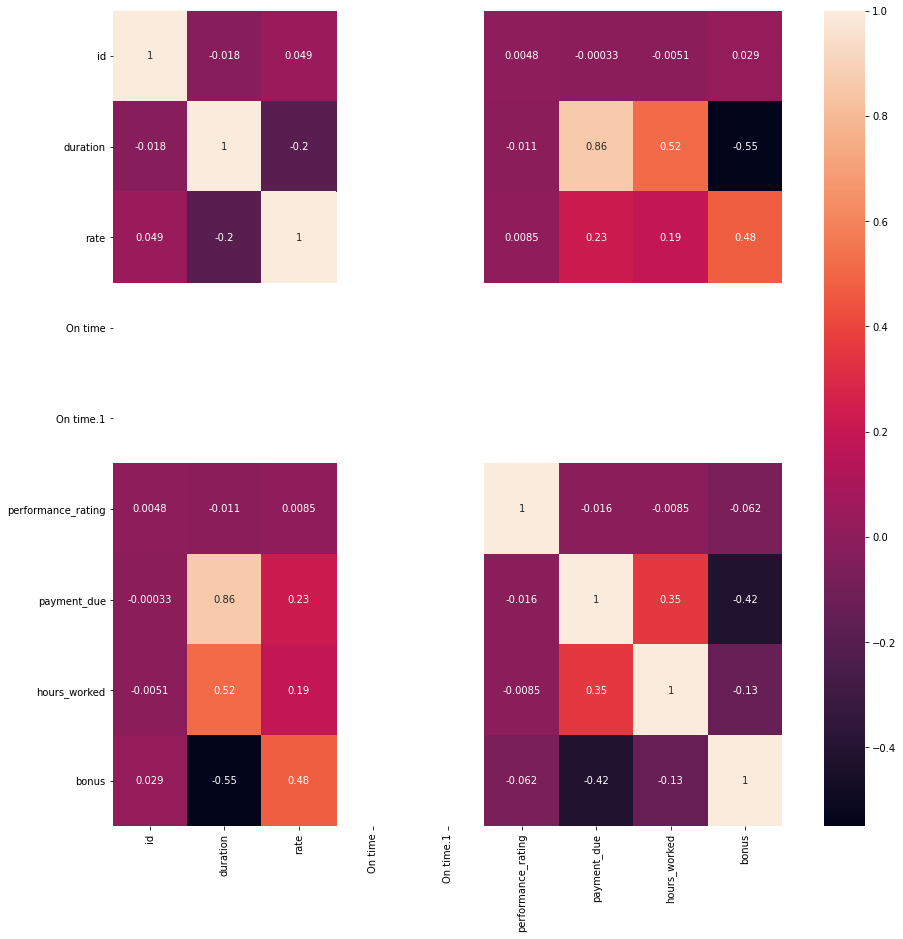

In [45]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

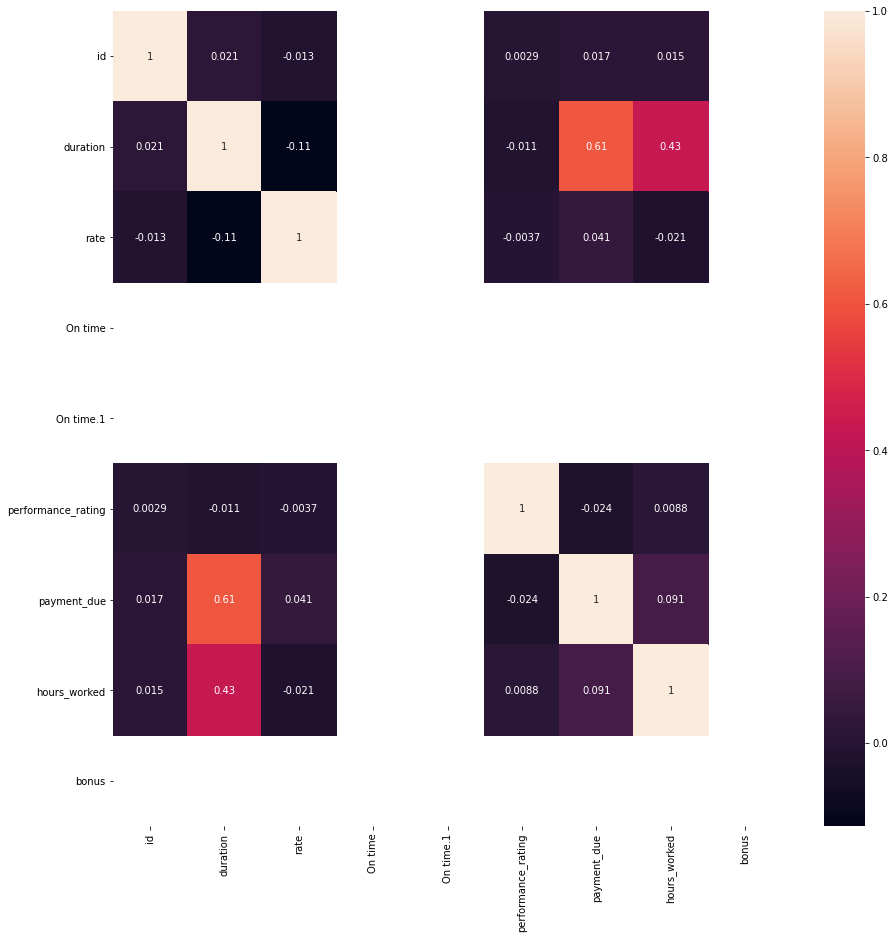

In [46]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(customer_service.corr(), annot=True)

<AxesSubplot:>

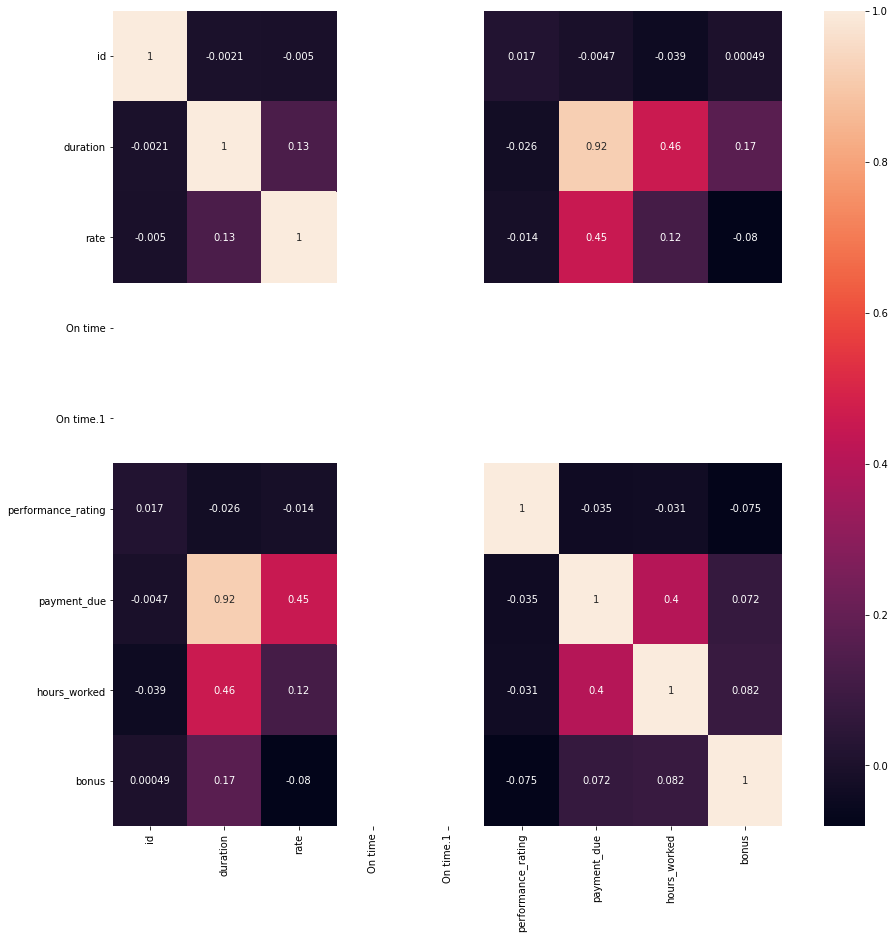

In [48]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(local_courier.corr(), annot=True)

In [54]:
n = len(pd.unique(df['worker']))
print(n)

1696


In [74]:
completed_total = len(df[df['status'] == 'Completed'])
print((completed_total/75437)*100)

7.054893487280777


In [76]:
canceled_total = len(df[df['status'] == 'Canceled'])
print((canceled_total/75437)*100)

7.170221509338918


In [78]:
no_show_total = len(df[df['status'] == 'NoShow'])
print((no_show_total/75437)*100)

0.3579145512149211


In [80]:
assigned_total = len(df[df['status'] == 'Assigned'])
print((assigned_total/75437)*100)

0.003976828346832456


In [81]:
expired_total = len(df[df['status'] == 'Expired'])
print((expired_total/75437)*100)

37.52932910905789


In [82]:
declined_total = len(df[df['status'] == 'Declined'])
print((declined_total/75437)*100)

0.7343876347150603


In [83]:
filled_total = len(df[df['status'] == 'Filled'])
print((filled_total/75437)*100)

47.11215981547517


In [84]:
sent_total = len(df[df['status'] == 'Sent'])
print((sent_total/75437)*100)

0.03446584567254796


In [72]:
oversubscribed_total = len(df[df['status'] == 'Oversubscribed'])
print(oversubscribed_total)

2


In [64]:
df['status'].unique()

array(['Completed', 'Canceled', 'NoShow', 'Assigned', 'Expired',
       'Declined', 'Filled', 'Sent', 'Oversubscribed'], dtype=object)

In [90]:
canceled_total_lc = len(local_courier[local_courier['status'] == 'Canceled'])
print((canceled_total_lc/36985)*100)

8.097877517912668


In [91]:
expired_total_lc = len(local_courier[local_courier['status'] == 'Expired'])
print((expired_total_lc/36985)*100)

26.521562795728


In [92]:
completed_total_lc = len(local_courier[local_courier['status'] == 'Completed'])
print((completed_total_lc/36985)*100)

5.372448289847235


In [93]:
noshow_total_lc = len(local_courier[local_courier['status'] == 'NoShow'])
print((noshow_total_lc/36985)*100)

0.346086251182912


In [94]:
declined_total_lc = len(local_courier[local_courier['status'] == 'Declined'])
print((declined_total_lc/36985)*100)

0.903068811680411


In [96]:
expired_total_lc = len(local_courier[local_courier['status'] == 'Expired'])
print((expired_total_lc/36985)*100)

26.521562795728


In [97]:
filled_total_lc = len(local_courier[local_courier['status'] == 'Filled'])
print((filled_total_lc/36985)*100)

58.75354873597405


In [98]:
sent_total_lc = len(local_courier[local_courier['status'] == 'Sent'])
print((sent_total_lc/36985)*100)

0.0


In [ ]:
local_courier['duration']

In [99]:
canceled_total_cs = len(customer_service[customer_service['status'] == 'Canceled'])
print((canceled_total_cs/18948)*100)

10.898247836183238


In [100]:
expired_total_cs = len(customer_service[customer_service['status'] == 'Expired'])
print((expired_total_cs/18948)*100)

42.5110829639012


In [101]:
completed_total_cs = len(customer_service[customer_service['status'] == 'Completed'])
print((completed_total_cs/18948)*100)

16.476672999788896


In [102]:
noshow_total_cs = len(customer_service[customer_service['status'] == 'NoShow'])
print((noshow_total_cs/18948)*100)

0.41165294490183657


In [103]:
declined_total_cs = len(customer_service[customer_service['status'] == 'Declined'])
print((declined_total_cs/18948)*100)

0.005277601857715854


In [104]:
sent_total_cs = len(customer_service[customer_service['status'] == 'Sent'])
print((sent_total_cs/18948)*100)

0.1372176483006122


In [105]:
filled_total_cs = len(customer_service[customer_service['status'] == 'Filled'])
print((filled_total_cs/18948)*100)

29.54401519949335


In [106]:
canceled_total_pt = len(product_tester[product_tester['status'] == 'Canceled'])
print((canceled_total_pt/19504)*100)

1.7893765381460214


In [107]:
expired_total_pt = len(product_tester[product_tester['status'] == 'Expired'])
print((expired_total_pt/19504)*100)

53.56337161607875


In [108]:
completed_total_pt = len(product_tester[product_tester['status'] == 'Completed'])
print((completed_total_pt/19504)*100)

1.0920836751435603


In [109]:
noshow_total_pt = len(product_tester[product_tester['status'] == 'NoShow'])
print((noshow_total_pt/19504)*100)

0.3281378178835111


In [110]:
declined_total_pt = len(product_tester[product_tester['status'] == 'Declined'])
print((declined_total_pt/19504)*100)

1.1228465955701394


In [111]:
filled_total_pt = len(product_tester[product_tester['status'] == 'Filled'])
print((filled_total_pt/19504)*100)

42.10418375717801


In [112]:
sent_total_pt = len(product_tester[product_tester['status'] == 'Sent'])
print((sent_total_pt/19504)*100)

0.0


In [116]:
df['start'] = pd.to_datetime(df['start'], format='%m/%d/%y %H:%M')
df['day_of_week'] = df['start'].dt.day_name()
df.head()

,id,worker,project,status,title,start,end,duration,rate,created_at,...,On time,checkout_at,On time.1,performance_rating,payment_status,approval_status,payment_due,hours_worked,bonus,day_of_week
0,58890,6c2978aa,Product Tester,Completed,Product Tester (Dallas),2021-03-25 20:00:00,3/25/21 21:30,1.5,20,3/19/21 22:51,...,NaN,3/25/21 22:17,NaN,1.0,paid,approved,41.40,2.06,100.0,Thursday
1,8769,016c3ad6,Local Courier,Completed,Local Courier (Dallas),2021-03-26 14:25:00,3/26/21 17:00,2.5,12,3/26/21 14:19,...,NaN,3/26/21 18:30,NaN,1.0,paid,approved,30.00,1.88,50.0,Friday
2,25104,8f06633b,Product Tester,Completed,Product Tester (Dallas),2021-03-24 14:00:00,3/24/21 15:30,1.5,20,3/18/21 15:08,...,NaN,3/24/21 16:02,NaN,1.0,paid,approved,40.00,2.15,50.0,Wednesday
3,47791,b68f79f8,Local Courier,Completed,Local Courier (Sacremento),2021-03-23 22:10:00,3/24/21 1:10,3.0,17,3/23/21 22:08,...,NaN,3/24/21 4:14,NaN,1.0,paid,approved,51.00,6.09,50.0,Tuesday
4,32056,ddcb2032,Local Courier,Completed,Local Courier (SF),2021-03-17 19:45:00,3/17/21 22:45,3.0,19,3/17/21 19:50,...,NaN,3/17/21 23:00,NaN,1.0,paid,approved,65.17,3.99,20.0,Wednesday


In [117]:
df.groupby(['status'])['duration'].mean()

status
Assigned          2.666667
Canceled          2.968828
Completed         3.053269
Declined          2.628159
Expired           2.536751
Filled            2.869966
NoShow            2.949074
Oversubscribed    2.000000
Sent              2.000000
Name: duration, dtype: float64

In [137]:
df['duration'].mean()

2.7631095308720526

In [119]:
local_courier.groupby(['status'])['duration'].mean()

status
Assigned          2.000000
Canceled          3.373623
Completed         3.728737
Declined          3.420659
Expired           3.541034
Filled            3.501990
NoShow            3.865234
Oversubscribed    0.000000
Name: duration, dtype: float64

In [120]:
product_tester.groupby(['status'])['duration'].mean()

status
Canceled     1.375358
Completed    1.436620
Declined     1.422374
Expired      1.487413
Filled       1.277886
NoShow       1.445312
Name: duration, dtype: float64

In [121]:
customer_service.groupby(['status'])['duration'].mean()

status
Assigned          3.000000
Canceled          2.651037
Completed         2.733664
Declined          2.000000
Expired           2.674731
Filled            2.752116
NoShow            2.679487
Oversubscribed    4.000000
Sent              2.000000
Name: duration, dtype: float64

In [122]:
df.groupby(['status'])['rate'].mean()

status
Assigned          12.333333
Canceled          14.108153
Completed         12.944382
Declined          17.974729
Expired           15.916499
Filled            16.130304
NoShow            15.881481
Oversubscribed    11.000000
Sent              10.000000
Name: rate, dtype: float64

In [124]:
local_courier.groupby(['status'])['rate'].mean()

status
Assigned          17.000000
Canceled          16.232387
Completed         16.751384
Declined          16.670659
Expired           16.306147
Filled            16.247170
NoShow            17.250000
Oversubscribed    12.000000
Name: rate, dtype: float64

In [126]:
product_tester.groupby(['status'])['rate'].mean()

status
Canceled     20
Completed    20
Declined     20
Expired      20
Filled       20
NoShow       20
Name: rate, dtype: int64

In [127]:
product_tester['rate'].unique()

array([20])

In [128]:
customer_service.groupby(['status'])['rate'].mean()

status
Assigned          10.000000
Canceled          10.031477
Completed         10.040038
Declined          10.000000
Expired           10.145872
Filled            10.000000
NoShow            10.256410
Oversubscribed    10.000000
Sent              10.000000
Name: rate, dtype: float64

array([[<AxesSubplot:title={'center':'performance_rating'}>]],
      dtype=object)

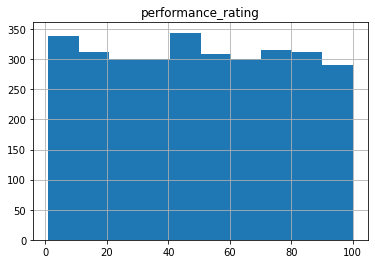

In [133]:
customer_service.hist(column = ['performance_rating'])

array([[<AxesSubplot:title={'center':'performance_rating'}>]],
      dtype=object)

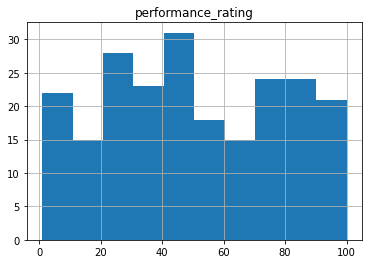

In [134]:
product_tester.hist(column = ['performance_rating'])

array([[<AxesSubplot:title={'center':'performance_rating'}>]],
      dtype=object)

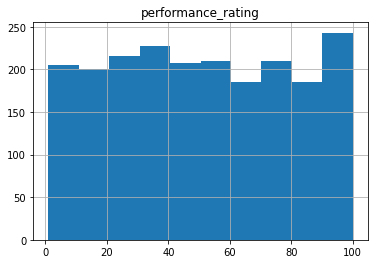

In [135]:
local_courier.hist(column = ['performance_rating'])

In [169]:
df['status'].replace({'Completed': 'Filled', 'Expired': 'Unfilled','Canceled':'Unfilled', 'Declined':'Unfilled',
                      'NoShow': 'Unfilled', 'Oversubscribed':'Unfilled', 'Assigned':'Filled', 'Sent':'Filled'}, inplace=True)

In [142]:
df.head()

,id,worker,project,status,title,start,end,duration,rate,created_at,...,On time,checkout_at,On time.1,performance_rating,payment_status,approval_status,payment_due,hours_worked,bonus,day_of_week
0,58890,6c2978aa,Product Tester,Filled,Product Tester (Dallas),2021-03-25 20:00:00,3/25/21 21:30,1.5,20,3/19/21 22:51,...,NaN,3/25/21 22:17,NaN,1.0,paid,approved,41.40,2.06,100.0,Thursday
1,8769,016c3ad6,Local Courier,Filled,Local Courier (Dallas),2021-03-26 14:25:00,3/26/21 17:00,2.5,12,3/26/21 14:19,...,NaN,3/26/21 18:30,NaN,1.0,paid,approved,30.00,1.88,50.0,Friday
2,25104,8f06633b,Product Tester,Filled,Product Tester (Dallas),2021-03-24 14:00:00,3/24/21 15:30,1.5,20,3/18/21 15:08,...,NaN,3/24/21 16:02,NaN,1.0,paid,approved,40.00,2.15,50.0,Wednesday
3,47791,b68f79f8,Local Courier,Filled,Local Courier (Sacremento),2021-03-23 22:10:00,3/24/21 1:10,3.0,17,3/23/21 22:08,...,NaN,3/24/21 4:14,NaN,1.0,paid,approved,51.00,6.09,50.0,Tuesday
4,32056,ddcb2032,Local Courier,Filled,Local Courier (SF),2021-03-17 19:45:00,3/17/21 22:45,3.0,19,3/17/21 19:50,...,NaN,3/17/21 23:00,NaN,1.0,paid,approved,65.17,3.99,20.0,Wednesday


In [145]:
df.groupby(['status'])['duration'].mean()

status
Assigned          2.666667
Filled            2.893840
Oversubscribed    2.000000
Sent              2.000000
Unfilled          2.609096
Name: duration, dtype: float64

In [146]:
local_courier['status'].replace({'Completed': 'Filled', 'Expired': 'Unfilled','Canceled':'Unfilled', 'Declined':'Unfilled','NoShow': 'Unfilled'}, 
                     inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [147]:
local_courier.groupby(['status'])['duration'].mean()

status
Assigned          2.000000
Filled            3.520987
Oversubscribed    0.000000
Unfilled          3.503336
Name: duration, dtype: float64

In [148]:
customer_service['status'].replace({'Completed': 'Filled', 'Expired': 'Unfilled','Canceled':'Unfilled', 'Declined':'Unfilled','NoShow': 'Unfilled'}, 
                     inplace=True)

In [149]:
customer_service.groupby(['status'])['duration'].mean()

status
Assigned          3.000000
Filled            2.745510
Oversubscribed    4.000000
Sent              2.000000
Unfilled          2.669904
Name: duration, dtype: float64

In [150]:
product_tester['status'].replace({'Completed': 'Filled', 'Expired': 'Unfilled','Canceled':'Unfilled', 'Declined':'Unfilled','NoShow': 'Unfilled'}, 
                     inplace=True)

In [151]:
customer_service.groupby(['status'])['duration'].mean()

status
Assigned          3.000000
Filled            2.745510
Oversubscribed    4.000000
Sent              2.000000
Unfilled          2.669904
Name: duration, dtype: float64

In [152]:
df.groupby(['status'])['rate'].mean()

status
Assigned          12.333333
Filled            15.715359
Oversubscribed    11.000000
Sent              10.000000
Unfilled          15.666078
Name: rate, dtype: float64

In [155]:
local_courier.groupby(['status'])['rate'].mean()

status
Assigned          17.000000
Filled            16.289413
Oversubscribed    12.000000
Unfilled          16.307779
Name: rate, dtype: float64

In [156]:
customer_service.groupby(['status'])['rate'].mean()

status
Assigned          10.000000
Filled            10.014335
Oversubscribed    10.000000
Sent              10.000000
Unfilled          10.123542
Name: rate, dtype: float64

In [172]:
pd.crosstab(df.status, df.day_of_week)

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
status,,,,,,,
Filled,5061,6562,4293,4437,5352,7947,7239
Unfilled,5689,8071,4024,3039,3794,5969,3960


In [173]:
chi2_contingency(pd.crosstab(df.status, df.day_of_week))

(1445.5964115300935,
 3.242899907906353e-309,
 6,
 array([[5827.0908175 , 7931.89022628, 4508.27110039, 4052.40287922,
         4957.63466204, 7543.23682013, 6070.47349444],
        [4922.9091825 , 6701.10977372, 3808.72889961, 3423.59712078,
         4188.36533796, 6372.76317987, 5128.52650556]]))

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75437 entries, 0 to 75436
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  75437 non-null  int64         
 1   worker              75437 non-null  object        
 2   project             75437 non-null  object        
 3   status              75437 non-null  object        
 4   title               75437 non-null  object        
 5   start               75437 non-null  datetime64[ns]
 6   end                 75437 non-null  object        
 7   duration            75437 non-null  float64       
 8   rate                75437 non-null  int64         
 9   created_at          75437 non-null  object        
 10  sent_at             74931 non-null  object        
 11  seen_at             33802 non-null  object        
 12  assigned_at         8323 non-null   object        
 13  canceled_at         5438 non-null   object    

In [193]:
feature_cols = ['rate', 'duration']
X = df[feature_cols] 
y = df.status

In [194]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [195]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [196]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[6871, 3412],
       [4589, 3988]])

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

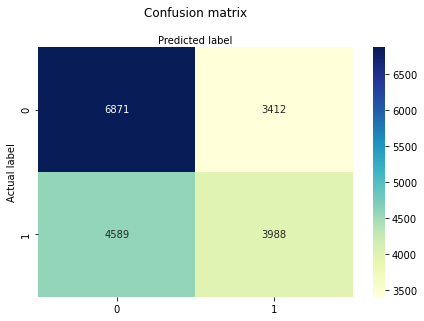

In [198]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [199]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5757688229056204


In [189]:
df.groupby(['status'])['payment_due'].mean()

status
Filled      45.879595
Unfilled    39.615177
Name: payment_due, dtype: float64

In [190]:
local_courier.groupby(['status'])['payment_due'].mean()

status
Assigned          34.000000
Filled            58.481026
Oversubscribed     0.000000
Unfilled          57.658792
Name: payment_due, dtype: float64

In [191]:
customer_service.groupby(['status'])['payment_due'].mean()

status
Assigned          30.000000
Filled            30.890803
Oversubscribed    40.000000
Sent              20.000000
Unfilled          26.961423
Name: payment_due, dtype: float64

In [192]:
product_tester.groupby(['status']['payment_due'].mean()

status
Filled      26.004297
Unfilled    29.661955
Name: payment_due, dtype: float64

In [225]:
workers = df.groupby(['worker','status']).count()
workers.head()

id  project  title  start  end  duration  rate  created_at  \
worker   status                                                                 
009fa984 Filled     7        7      7      7    7         7     7           7   
         Unfilled   2        2      2      2    2         2     2           2   
011cbba7 Filled    14       14     14     14   14        14    14          14   
         Unfilled  12       12     12     12   12        12    12          12   
014a095e Unfilled   2        2      2      2    2         2     2           2   

                   sent_at  seen_at  ...  checkout_at  On time.1  \
worker   status                      ...                           
009fa984 Filled          7        3  ...            1          0   
         Unfilled        2        2  ...            0          0   
011cbba7 Filled         14        4  ...            1          0   
         Unfilled       12       11  ...            0          0   
014a095e Unfilled        2        0  ...            0          0   

                   performance_rating  payment_status  approval_status  \
worker   status                                                          
009fa984 Filled                     1               1                1   
         Unfilled                   0               0                0   
011cbba7 Filled                     1               1                1   
         Unfilled                   0               0                0   
014a095e Unfilled                   0               0                0   

                   payment_due  hours_worked  bonus  day_of_week  time_of_day  
worker   status                                                                
009fa984 Filled              7             1      2            7            7  
         Unfilled            2             0      2            2            2  
011cbba7 Filled             14             1      5           14           14  
         Unfilled           12             0      8           12           12  
014a095e Unfilled            2             0      2            2            2  

[5 rows x 28 columns]

In [207]:
workers_df = workers.to_frame()

In [209]:
workers_df.sort_values(by=['status'])

,status
worker,
b4d5abcb,1
caaa0cbd,1
9cf2c073,1
eddaa1cf,1
4c295efd,1
...,...
087547cd,360
148325cf,364
0d472817,369


In [223]:
workers2 = df.groupby(['worker'])['status']
print(workers2)

In [210]:
df['start'] = pd.to_datetime(df['start']) 

In [211]:
df['time_of_day'] = df['start'].dt.time

In [212]:
df.groupby(['status'])['start']

In [213]:
df.head()

,id,worker,project,status,title,start,end,duration,rate,created_at,...,checkout_at,On time.1,performance_rating,payment_status,approval_status,payment_due,hours_worked,bonus,day_of_week,time_of_day
0,58890,6c2978aa,Product Tester,Filled,Product Tester (Dallas),2021-03-25 20:00:00,3/25/21 21:30,1.5,20,3/19/21 22:51,...,3/25/21 22:17,NaN,1.0,paid,approved,41.40,2.06,100.0,Thursday,20:00:00
1,8769,016c3ad6,Local Courier,Filled,Local Courier (Dallas),2021-03-26 14:25:00,3/26/21 17:00,2.5,12,3/26/21 14:19,...,3/26/21 18:30,NaN,1.0,paid,approved,30.00,1.88,50.0,Friday,14:25:00
2,25104,8f06633b,Product Tester,Filled,Product Tester (Dallas),2021-03-24 14:00:00,3/24/21 15:30,1.5,20,3/18/21 15:08,...,3/24/21 16:02,NaN,1.0,paid,approved,40.00,2.15,50.0,Wednesday,14:00:00
3,47791,b68f79f8,Local Courier,Filled,Local Courier (Sacremento),2021-03-23 22:10:00,3/24/21 1:10,3.0,17,3/23/21 22:08,...,3/24/21 4:14,NaN,1.0,paid,approved,51.00,6.09,50.0,Tuesday,22:10:00
4,32056,ddcb2032,Local Courier,Filled,Local Courier (SF),2021-03-17 19:45:00,3/17/21 22:45,3.0,19,3/17/21 19:50,...,3/17/21 23:00,NaN,1.0,paid,approved,65.17,3.99,20.0,Wednesday,19:45:00


In [230]:
df['hour'] = pd.to_datetime(df['time_of_day'], format='%H:%M:%S').dt.hour
df.head()

,id,worker,project,status,title,start,end,duration,rate,created_at,...,On time.1,performance_rating,payment_status,approval_status,payment_due,hours_worked,bonus,day_of_week,time_of_day,hour
0,58890,6c2978aa,Product Tester,Filled,Product Tester (Dallas),2021-03-25 20:00:00,3/25/21 21:30,1.5,20,3/19/21 22:51,...,NaN,1.0,paid,approved,41.40,2.06,100.0,Thursday,20:00:00,20
1,8769,016c3ad6,Local Courier,Filled,Local Courier (Dallas),2021-03-26 14:25:00,3/26/21 17:00,2.5,12,3/26/21 14:19,...,NaN,1.0,paid,approved,30.00,1.88,50.0,Friday,14:25:00,14
2,25104,8f06633b,Product Tester,Filled,Product Tester (Dallas),2021-03-24 14:00:00,3/24/21 15:30,1.5,20,3/18/21 15:08,...,NaN,1.0,paid,approved,40.00,2.15,50.0,Wednesday,14:00:00,14
3,47791,b68f79f8,Local Courier,Filled,Local Courier (Sacremento),2021-03-23 22:10:00,3/24/21 1:10,3.0,17,3/23/21 22:08,...,NaN,1.0,paid,approved,51.00,6.09,50.0,Tuesday,22:10:00,22
4,32056,ddcb2032,Local Courier,Filled,Local Courier (SF),2021-03-17 19:45:00,3/17/21 22:45,3.0,19,3/17/21 19:50,...,NaN,1.0,paid,approved,65.17,3.99,20.0,Wednesday,19:45:00,19


In [231]:
pd.crosstab(df.status, df.hour)

hour,0,1,2,3,4,6,9,12,13,14,15,16,17,18,19,20,21,22,23
status,,,,,,,,,,,,,,,,,,,
Filled,1540,2061,442,853,246,80,112,80,1093,4876,5118,3264,3407,2815,4150,2998,1821,3930,2005
Unfilled,1499,760,12,41,1,8,2,10,716,3347,2986,2001,6404,2048,3419,5000,1820,3627,845


In [232]:
chi2_contingency(pd.crosstab(df.status, df.hour))

(5028.979170331375,
 0.0,
 18,
 array([[1647.30502273, 1529.1370415 ,  246.09295173,  484.59713403,
          133.88757506,   47.70083646,   61.79426541,   48.78494638,
          980.57742222, 4457.31793417, 4392.81339396, 2853.91936318,
         5318.10121028, 2636.01326935, 4102.81399048, 4335.35556822,
         1973.62210851, 4096.30933096, 1544.85663534],
        [1391.69497727, 1291.8629585 ,  207.90704827,  409.40286597,
          113.11242494,   40.29916354,   52.20573459,   41.21505362,
          828.42257778, 3765.68206583, 3711.18660604, 2411.08063682,
         4492.89878972, 2226.98673065, 3466.18600952, 3662.64443178,
         1667.37789149, 3460.69066904, 1305.14336466]]))

In [233]:
df.to_csv('filled_unfilled.csv')

In [234]:
local_courier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36985 entries, 1 to 74926
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  36985 non-null  int64  
 1   worker              36985 non-null  object 
 2   project             36985 non-null  object 
 3   status              36985 non-null  object 
 4   title               36985 non-null  object 
 5   start               36985 non-null  object 
 6   end                 36985 non-null  object 
 7   duration            36985 non-null  float64
 8   rate                36985 non-null  int64  
 9   created_at          36985 non-null  object 
 10  sent_at             36621 non-null  object 
 11  seen_at             11940 non-null  object 
 12  assigned_at         2985 non-null   object 
 13  canceled_at         3012 non-null   object 
 14  confirmed_at        1875 non-null   object 
 15  confirmedby         0 non-null      object 
 16  canc

In [236]:
lc_bonus = 13464/36985
print(lc_bonus)

0.36403947546302556


In [237]:
customer_service.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18948 entries, 5 to 73402
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18948 non-null  int64  
 1   worker              18948 non-null  object 
 2   project             18948 non-null  object 
 3   status              18948 non-null  object 
 4   title               18948 non-null  object 
 5   start               18948 non-null  object 
 6   end                 18948 non-null  object 
 7   duration            18948 non-null  float64
 8   rate                18948 non-null  int64  
 9   created_at          18948 non-null  object 
 10  sent_at             18865 non-null  object 
 11  seen_at             13081 non-null  object 
 12  assigned_at         4790 non-null   object 
 13  canceled_at         2075 non-null   object 
 14  confirmed_at        2340 non-null   object 
 15  confirmedby         1 non-null      object 
 16  canc

In [238]:
product_tester.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19504 entries, 0 to 75436
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19504 non-null  int64  
 1   worker              19504 non-null  object 
 2   project             19504 non-null  object 
 3   status              19504 non-null  object 
 4   title               19504 non-null  object 
 5   start               19504 non-null  object 
 6   end                 19504 non-null  object 
 7   duration            19504 non-null  float64
 8   rate                19504 non-null  int64  
 9   created_at          19504 non-null  object 
 10  sent_at             19445 non-null  object 
 11  seen_at             8781 non-null   object 
 12  assigned_at         548 non-null    object 
 13  canceled_at         351 non-null    object 
 14  confirmed_at        332 non-null    object 
 15  confirmedby         0 non-null      object 
 16  canc

In [239]:
pt_bonus = 11881/19504
print(pt_bonus)

0.6091570959803118
